# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

#
#
#

# Title: 
## Exploratory Analysis of Astronaut Data prior to January 15, 2020

In [62]:
library('tidyverse')
library('forcats')
library('ggplot2')

In [2]:
astronauts <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-14/astronauts.csv')
astronauts |> head() 
astronauts |> colnames() 

Rows: 1277 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): name, original_name, sex, nationality, military_civilian, selectio...
dbl (13): id, number, nationwide_number, year_of_birth, year_of_selection, m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,⋯,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,⋯,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0,0
2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,⋯,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0,0
3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,⋯,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0,0
4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,⋯,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0,0
5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,⋯,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0,0
6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,⋯,1962,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0,0


[1] "id"                       "number"                  
 [3] "nationwide_number"        "name"                    
 [5] "original_name"            "sex"                     
 [7] "year_of_birth"            "nationality"             
 [9] "military_civilian"        "selection"               
[11] "year_of_selection"        "mission_number"          
[13] "total_number_of_missions" "occupation"              
[15] "year_of_mission"          "mission_title"           
[17] "ascend_shuttle"           "in_orbit"                
[19] "descend_shuttle"          "hours_mission"           
[21] "total_hrs_sum"            "field21"                 
[23] "eva_hrs_mission"          "total_eva_hrs"

In [3]:
df=astronauts |> 
    select(name, sex, year_of_birth, nationality, military_civilian, year_of_mission, total_number_of_missions, occupation) 
df |> head() 

name,sex,year_of_birth,nationality,military_civilian,year_of_mission,total_number_of_missions,occupation
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
"Gagarin, Yuri",male,1934,U.S.S.R/Russia,military,1961,1,pilot
"Titov, Gherman",male,1935,U.S.S.R/Russia,military,1961,1,pilot
"Glenn, John H., Jr.",male,1921,U.S.,military,1962,2,pilot
"Glenn, John H., Jr.",male,1921,U.S.,military,1998,2,PSP
"Carpenter, M. Scott",male,1925,U.S.,military,1962,1,Pilot
"Nikolayev, Andriyan",male,1929,U.S.S.R/Russia,military,1962,2,pilot


# 
# 
#

# Visualization 1: 
## Nationality of Youngest Astronauts by Military Status

In [114]:
df_viz1_a=df |> 
    select(nationality, year_of_birth, year_of_mission, military_civilian, name) |> 
    mutate(astronaut_age=year_of_mission-year_of_birth) |> 
    group_by(nationality) |> 
    slice_min(astronaut_age) |>  
    distinct(nationality, military_civilian, astronaut_age, .keep_all=TRUE) 

df_viz1_a

nationality,year_of_birth,year_of_mission,military_civilian,name,astronaut_age
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Afghanistan,1959,1988,military,"Mohmand, Abdul Ahad",29
Australia,1951,1983,civilian,"Thomas, Andrew S. W.",32
Austria,1960,1991,civilian,"Viehbock, Franz",31
Belgium,1961,2002,military,"De Winne, Frank",41
Brazil,1963,2006,military,"Pontes, Marcos Cesar",43
Bulgaria,1951,1988,military,"Aleksandrov, Aleksandr",37
Canada,1949,1984,military,"Garneau, Marc Joseph Jean-Pierre",35
China,1980,2013,military,"Wang, Yapi",33
Cuba,1942,1980,military,Arnaldo Tamayo Mendez,38


In [161]:
# Select the top 4 youngest astronauts from each military and civilian category 

df_viz1_b=df_viz1_a |> 
    group_by(military_civilian) |> 
    slice_min(astronaut_age, n=4) |> 
    mutate(military_civilian=ifelse(military_civilian=="civilian", "Civilian", "Military"), 
           nationality_sorted=nationality |> 
           fct_reorder(astronaut_age))

df_viz1_b

nationality,year_of_birth,year_of_mission,military_civilian,name,astronaut_age,nationality_sorted
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>
U.K.,1963,1991,Civilian,Helen Sharman,28,U.K.
Republic of South Africa,1973,2002,Civilian,"Shuttleworth, M. Richard",29,Republic of South Africa
Romania,1952,1981,Civilian,Dumitru Prunariu,29,Romania
Saudi Arabia,1956,1985,Civilian,"Al-saud, Sultan bin Salman",29,Saudi Arabia
U.S.S.R/Russia,1935,1961,Military,"Titov, Gherman",26,U.S.S.R/Russia
Afghanistan,1959,1988,Military,"Mohmand, Abdul Ahad",29,Afghanistan
Czechoslovakia,1948,1978,Military,Vladimir Remek,30,Czechoslovakia
U.S.,1934,1966,Military,"Cernan, Eugene A.",32,U.S.


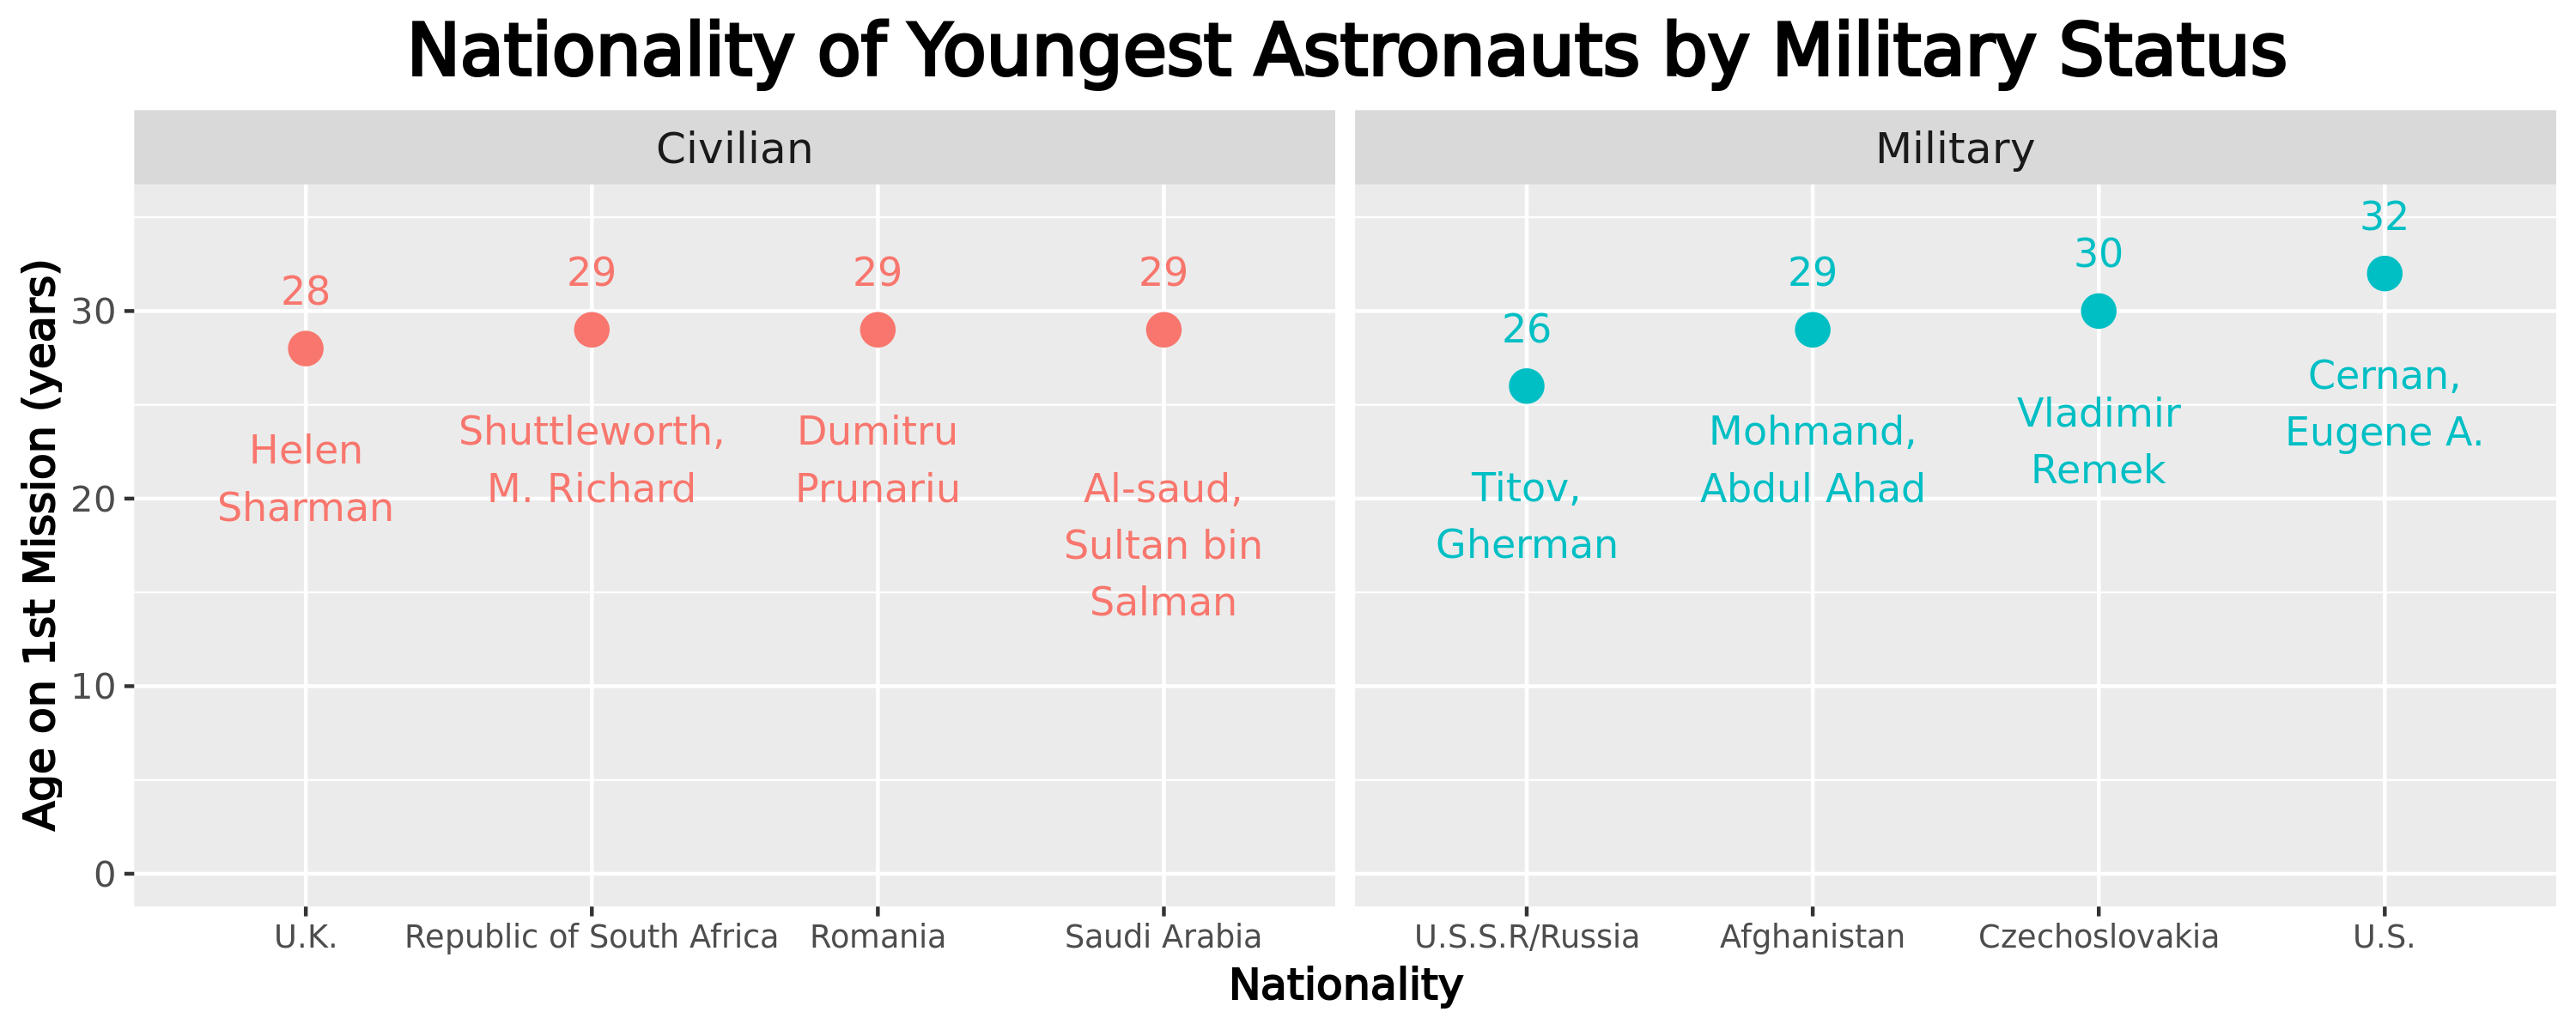

In [162]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)

p1=ggplot(df_viz1_b, aes(x=nationality_sorted, y=astronaut_age, color=military_civilian)) + 
    geom_point(size=4) + 
    facet_wrap(~military_civilian, scales='free_x', ncol=2, nrow=1) + 
    geom_text(aes(label=astronaut_age), vjust=-1.5) + 
    geom_text(aes(label=str_wrap(name, width=12)), vjust=2) + 
    labs(title="Nationality of Youngest Astronauts by Military Status", 
         x='Nationality', 
         y="Age on 1st Mission (years)") + 
    coord_cartesian(ylim=c(0, 35)) + 
    theme(plot.title=element_text(hjust=0.5, face='bold', size=20), 
         axis.title=element_text(size=12, face='bold'), 
         axis.text.y=element_text(size=10), 
         strip.text=element_text(size=12), 
         legend.position='none')
p1

#
#
#

# Visualization 2: 
## Occupation of Astronaut's Participating in the Most Missions

In [7]:
df_viz2_a=df |> 
    select(occupation, total_number_of_missions)

df_viz2_a |> head()
table(df_viz2_a$occupation)

occupation,total_number_of_missions
<chr>,<dbl>
pilot,1
pilot,1
pilot,2
PSP,2
Pilot,1
pilot,2



        Flight engineer                     MSP      Other (Journalist) 
                      4                     498                       1 
  Other (Space tourist)   Other (space tourist)                     PSP 
                      3                       5                      59 
                  Pilot           Space tourist               commander 
                      1                       2                     315 
        flight engineer                   pilot spaceflight participant 
                    192                     196                       1 

In [164]:
df_viz2_b=df_viz2_a |> 
   mutate(occupation_clean=occupation |> 
          fct_collapse(occupation, 
                        MSP='MSP',
                        Commander='commander', 
                        Pilot=c('pilot', 'Pilot'), 
                        'Flight Engineer'=c('flight engineer', 'Flight engineer'),
                        PSP='PSP')) |> 
    group_by(occupation_clean) |> 
    summarize(average_cummulative_missions=mean(total_number_of_missions)) |> 
       mutate(occupation_lumped=ifelse(occupation_clean=="", "Other",as.character(occupation_clean)), 
              occupation_sorted=occupation_lumped |> 
              fct_reorder(average_cummulative_missions)) 

df_viz2_b |> head() 

occupation_clean,average_cummulative_missions,occupation_lumped,occupation_sorted
<fct>,<dbl>,<chr>,<fct>
Flight Engineer,2.494898,Flight Engineer,Flight Engineer
MSP,3.228916,MSP,MSP
,1.166667,Other,Other
PSP,1.576271,PSP,PSP
Pilot,2.802030,Pilot,Pilot
Commander,3.342857,Commander,Commander


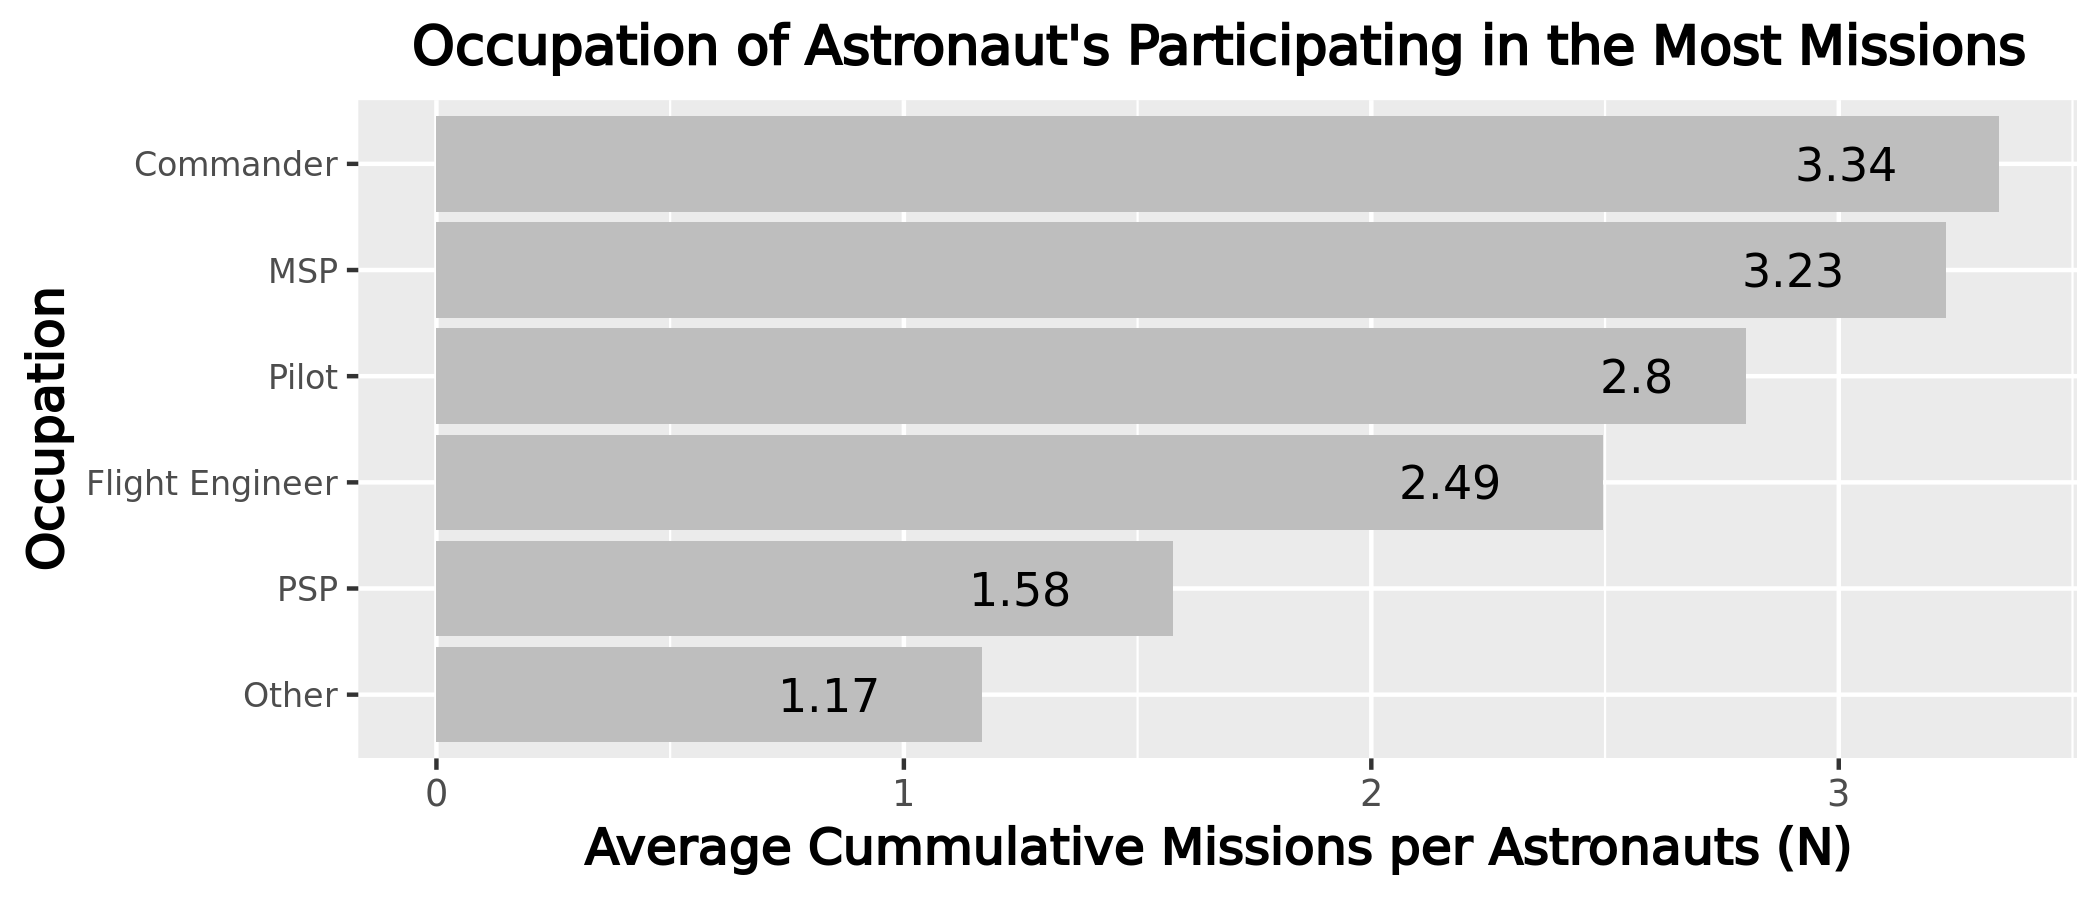

In [165]:
options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

p2=ggplot(df_viz2_b, aes(x=average_cummulative_missions, y=occupation_sorted)) + 
    geom_col(fill="grey") + 
    geom_text(aes(label=round(average_cummulative_missions, 2)), hjust=2, vjust=.50) + 
    labs(title="Occupation of Astronaut's Participating in the Most Missions", 
         x='Average Cummulative Missions per Astronauts (N)', 
         y="Occupation") + 
    theme(plot.title=element_text(hjust=0.5, face='bold', size=13), 
         axis.title=element_text(size=12, face='bold'),
         axis.text.y=element_text(size=8), 
        legend.position='none')

p2

#
#
#

# Visualization 3: 
## Demographic Information of Astronaut's Cumulative Missions

In [158]:
df_viz3_a=df |> 
    select(sex, military_civilian, total_number_of_missions, year_of_birth, year_of_mission) |> 
    mutate(astronaut_age=year_of_mission-year_of_birth, 
           Sex=sex, 
           Sex=ifelse(Sex=="male", "Male", "Female"), 
           military_civilian=ifelse(military_civilian=="civilian", "Civilian", "Military"))

df_viz3_a |> head() 

sex,military_civilian,total_number_of_missions,year_of_birth,year_of_mission,astronaut_age,Sex
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
male,Military,1,1934,1961,27,Male
male,Military,1,1935,1961,26,Male
male,Military,2,1921,1962,41,Male
male,Military,2,1921,1998,77,Male
male,Military,1,1925,1962,37,Male
male,Military,2,1929,1962,33,Male


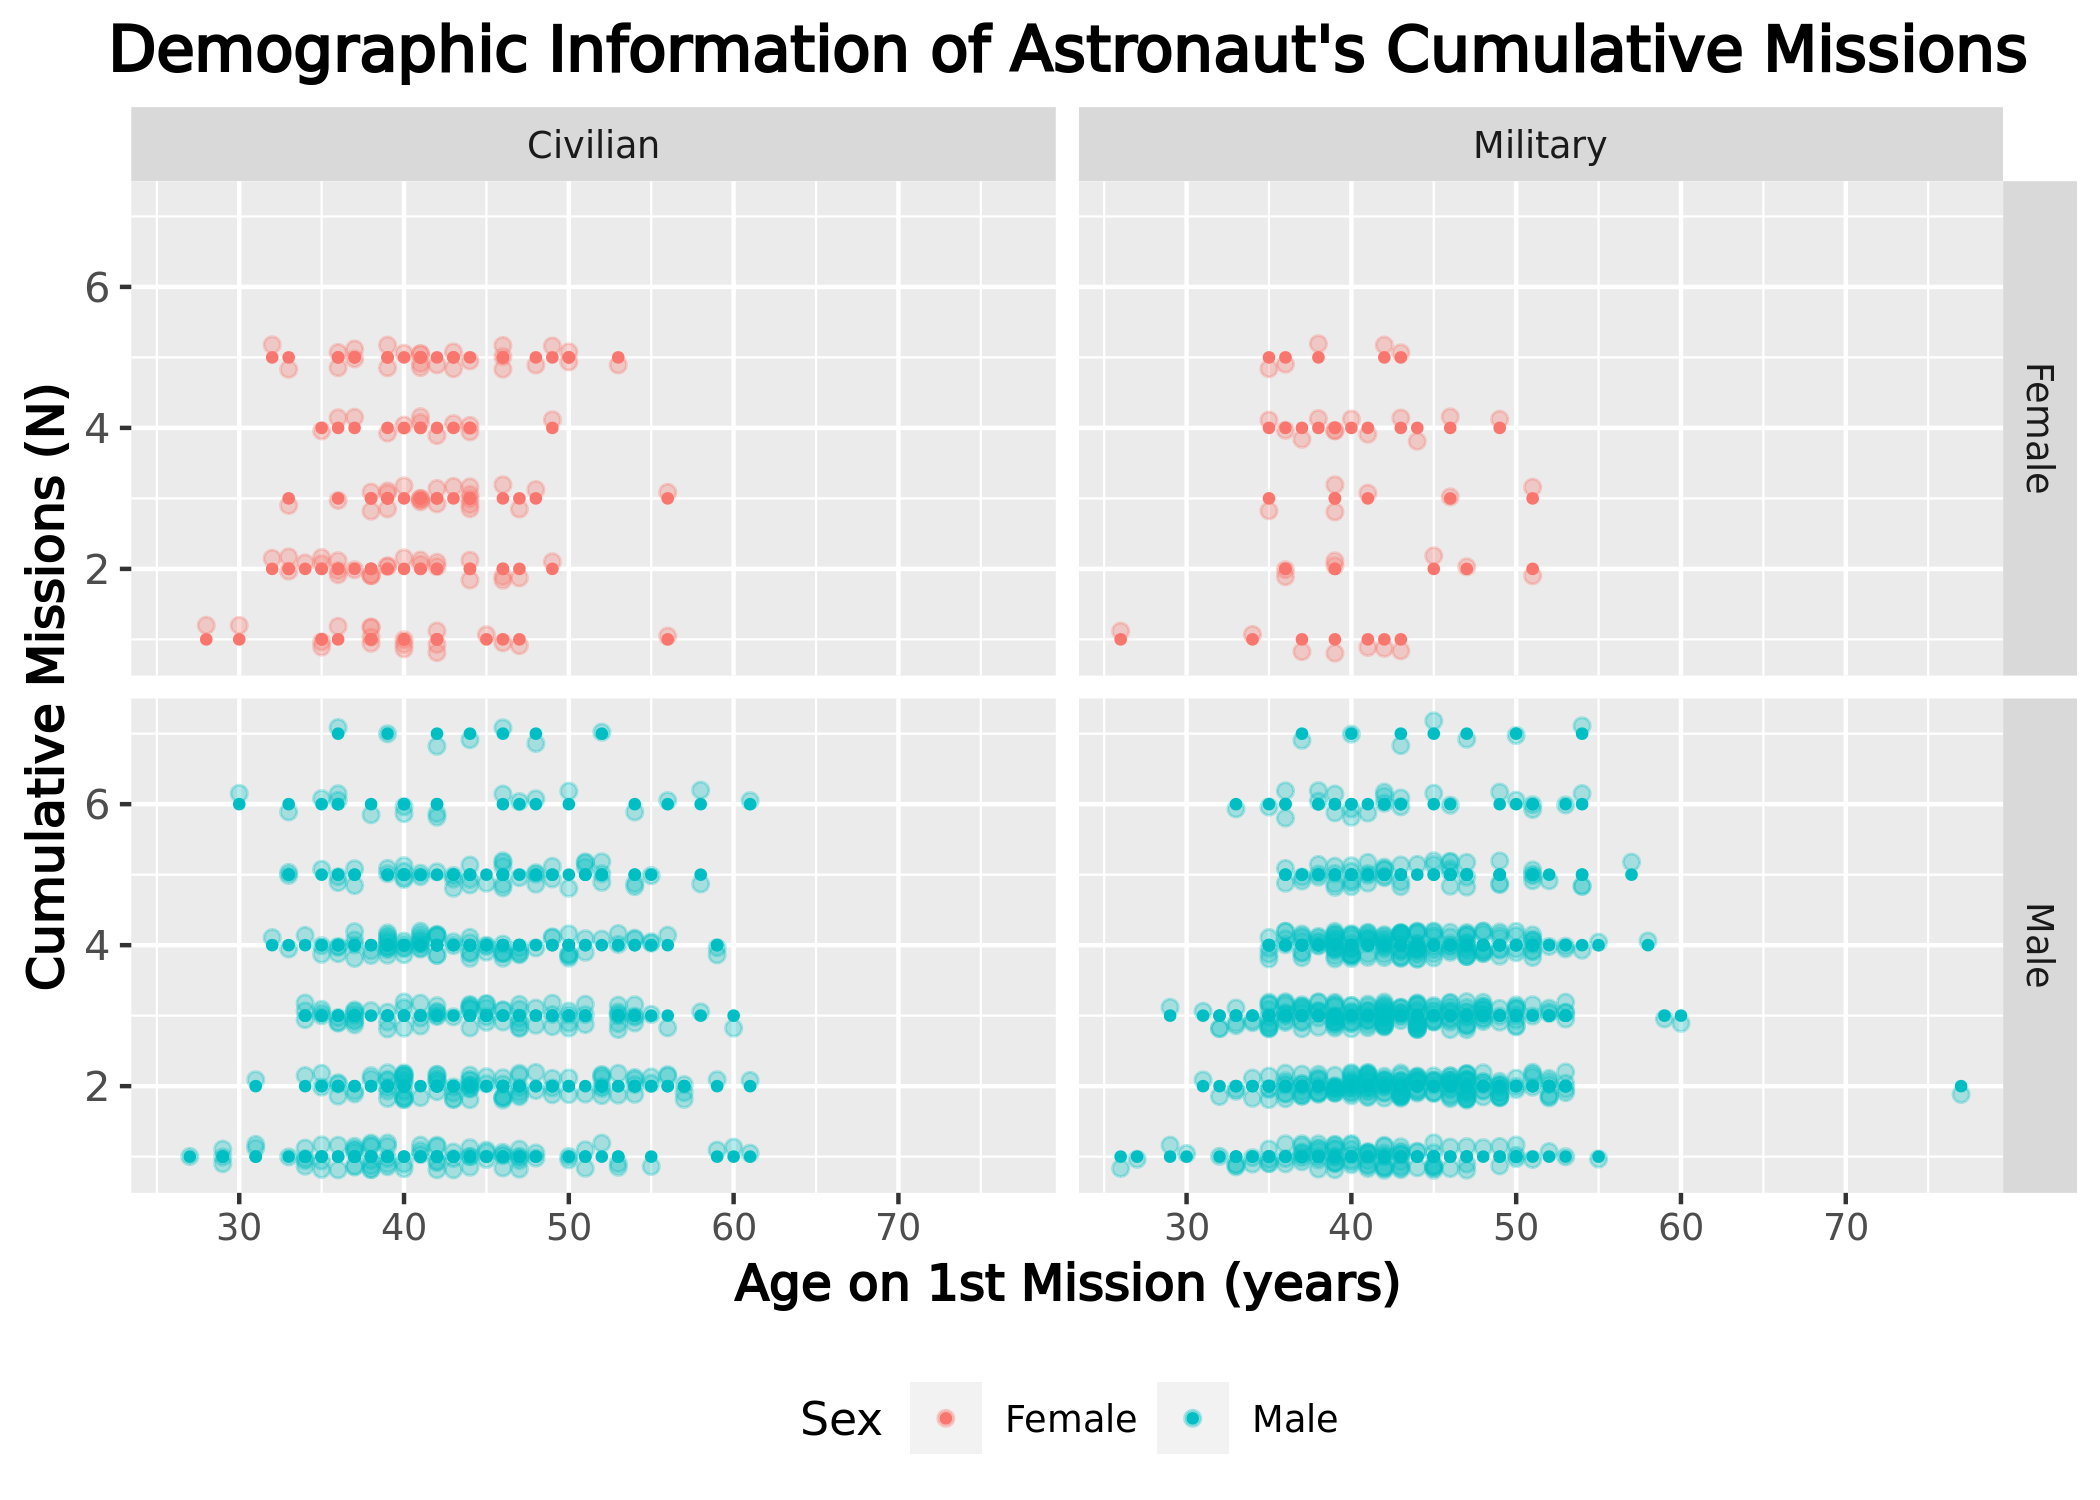

In [166]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 300)

p3=ggplot(df_viz3_a, aes(x=astronaut_age, y=total_number_of_missions, color=Sex)) + 
    geom_point(size=0.75) + 
    facet_grid(Sex~military_civilian) + 
    labs(title="Demographic Information of Astronaut's Cumulative Missions", 
         x="Age on 1st Mission (years)", 
         y='Cumulative Missions (N)') + 
    geom_jitter(width=0, height=0.2, alpha=0.3) + 
    theme(plot.title=element_text(hjust=0.5, face='bold', size=15), 
         axis.title=element_text(size=12, face='bold'), 
         axis.text.y=element_text(size=10), 
         legend.position='bottom')

p3

# 
# 
# 

# Analysis Description

    The dataset used in this analysis comes from publicly available information on NASA, Roscosmos, and other websites prior to January 15, 2020, compiled together to investigate data on all astronauts that participated in space missions. After previewing the data, several key variables were identified to focus on for analysis which included: name, nationality, occupation, sex, military status, astronaut age on their 1st mission, and cumulative number of missions. Initially, we had to clean some of the data, by combining variable levels that were spelled the same but had different capitalizations, removing duplicate values, sorting the data,  and creating a couple of new variables such as “astronaut age of 1st mission”. Lastly, we adjusted the graph settings to present the data most effectively by using color, labels, facet grids, lumped data, and jittered data. 



    In the first visualization, we investigate which nationalities had the youngest astronauts, stratified by military status. In order to determine which astronauts were the youngest, we used their date of birth and subtracted that from the year they participated in their first mission. We see that among astronauts with military status, the U.S.S.R/Russia had the youngest astronaut at 26 years old and among astronauts classified as civilains, the U.K. had the youngest astronaut at 28 years old. In the second visualization, we explored how an average astronaut’s number of cumulative space missions relates to their occupation. We see that astronauts with the occupation of commander on average participated in 3.34 cumulative space missions, the most of any other occupation. In the third visualization, we explored how an astronaut’s cumulative number of space missions relates to their age on the first mission, gender, and military status. We see that in terms of gender, males had a wider range of cumulative space missions from 0 to 8, while females only had 0 to 5 cumulative space missions and this pattern does not change according to military status. 